In [3]:
from database import Database
from file_utils import *
from models import Member
import pickle
import numpy as np

members = Database().members_table()

with open("people.pkl", 'rb') as file:
    all = pickle.load(file)

In [4]:
import pandas as pd

In [5]:
a = all[0]

In [6]:
a.name

'Magdalena Błeńska'

In [7]:
a.representation

array([ 0.05469247, -0.0665012 ,  0.04317334, -0.00495657, -0.04881677,
        0.07858331, -0.03891452,  0.18982802, -0.19349381,  0.05374943,
       -0.06896212,  0.02517324,  0.04573154,  0.02614803,  0.06619898,
       -0.06148352,  0.1196926 , -0.07583418,  0.08648308,  0.00418662,
        0.02058505, -0.04683811,  0.06486165,  0.03753199,  0.02355651,
        0.05065452,  0.05755502, -0.10457614, -0.13381958, -0.07012915,
       -0.01911015, -0.04911895,  0.02345225,  0.07288831, -0.09729207,
       -0.01912116, -0.0860671 ,  0.08589752, -0.13509355, -0.00525633,
       -0.0480726 , -0.01246819, -0.06158394,  0.05174482, -0.02741939,
        0.08749153,  0.03240972, -0.11484692, -0.11341407,  0.01939058,
        0.23576456,  0.01968047, -0.02157095, -0.01739761,  0.08634907,
        0.00787343,  0.04091279,  0.01201597,  0.18262288, -0.10240593,
        0.0570411 , -0.05083935, -0.13286135, -0.05200791,  0.0946802 ,
       -0.14410555, -0.01899474,  0.1301259 , -0.00420268,  0.12

In [8]:
len(all)

460

In [9]:
reps = [i.representation for i in all]

In [10]:
avg_person = np.mean(reps, axis = 0)

In [11]:
distances = [np.linalg.norm(avg_person-i) for i in reps]

In [12]:
min(distances)

0.7193356803138735

In [13]:
np.argmin(distances)

54

In [24]:
np.argsort(distances)[:3]

array([ 54, 223, 326])

In [27]:
all[54].name, all[223].name, all[326].name

('Piotr Zgorzelski', 'Tomasz Zieliński', 'Józef Brynkus')

In [15]:
df = pd.DataFrame(reps)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca_pred = pd.DataFrame(pca.transform(df))

In [65]:
pca_pred['color'] = 'green'
pca_pred['size'] = 30

In [66]:
pca_pred.loc[54,'color'] = 'red'
pca_pred.loc[223,'color'] = 'red'
pca_pred.loc[326,'color'] = 'red'
pca_pred.loc[54,'size'] =  60 
pca_pred.loc[223,'size'] = 60
pca_pred.loc[326,'size'] = 60

In [67]:
pca_pred.head()

,0,1,color,size
0,0.387782,0.034364,green,30
1,0.720374,-0.061309,green,30
2,-0.020933,0.322987,green,30
3,0.057676,0.615303,green,30
4,-0.259910,-0.048447,green,30


In [68]:
import matplotlib.pyplot as plt

Text(0.5,1,'Principal component projection of embeddings')

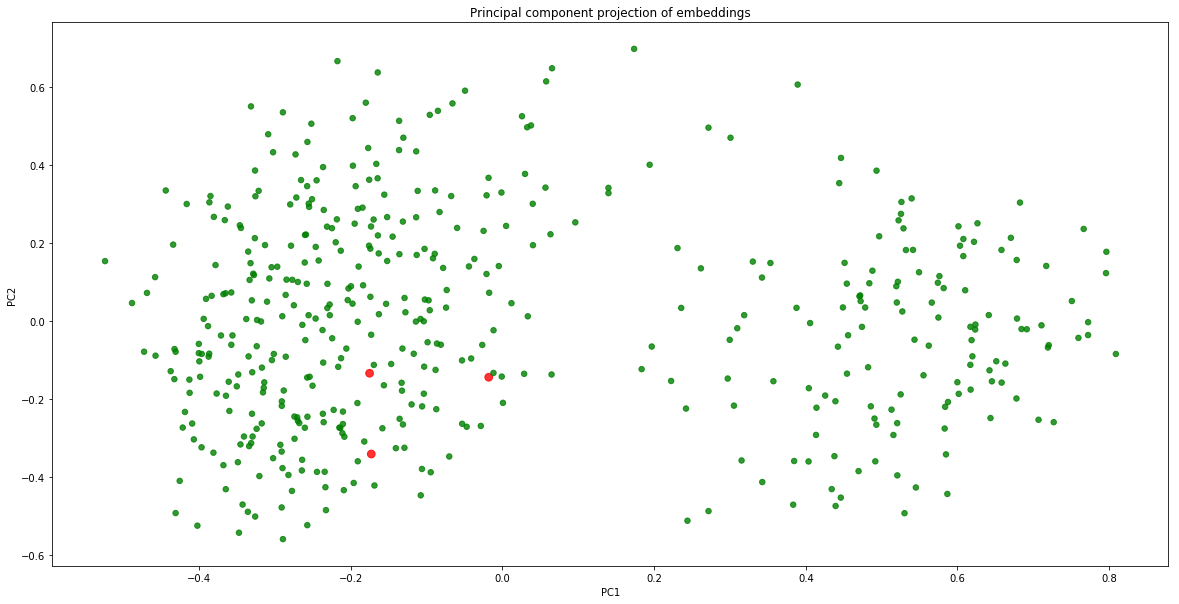

In [69]:
plt.figure(figsize=(20,10))
plt.scatter(pca_pred[0],pca_pred[1], c = pca_pred['color'], alpha = 0.8, s = pca_pred['size'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Principal component projection of embeddings")